### Import the relevant libraries

In [1]:
# Import the relevant libraries.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
from platform import python_version
print(python_version())


C:\Users\sangeethabackeyaraj\anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sangeethabackeyaraj\anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sangeethabackeyaraj\anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sangeethabackeya

1.14.0
3.7.10


C:\Users\sangeethabackeyaraj\anaconda3\envs\py3-TF1\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sangeethabackeyaraj\anaconda3\envs\py3-TF1\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sangeethabackeyaraj\anaconda3\envs\py3-TF1\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\U

### Data generation

Data is generated and stored to an npz file. Npz is numpy's file type which allows us to save numpy arrays.

In [2]:
# Declare a variable containing the size of the training set you want to generate.
observations = 1000
# x and z are the inputs.
# They are generated randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations x 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# column_stack is a Numpy method, which combines two matrices (vectors) into one.
generated_inputs = np.column_stack((xs,zs))

# A random small noise is added to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to  f(x,z) = 2x - 3z + 5 + noise .
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
generated_targets = 2*xs - 3*zs + 5 + noise

# save into an npz file called "TF_intro"
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow


In [3]:
# The shape of the data we've prepared above. They can also be called as number of inputs, number of outputs.
input_size = 2
output_size = 1

### Outlining the model

In [4]:
# Define a basic TensorFlow object - the placeholder.
# We have to feed the inputs and targets to the model. 
# In the TensorFlow context, we feed the data to the model THROUGH the placeholders. 
# The  inputs and targets are contained in the above generated .npz file.

# The first None parameter of the placeholders' shape means that
# this dimension could be of any length. That's since we are mainly interested in
# the input size, i.e. how many input variables we have and not the number of samples (observations)
# The number of input variables changes the MODEL itself, while the number of observations doesn't.
# The weights and biases were independent of the number of samples, so the MODEL is independent of samples.
# Until this point, we've only fed the data to the model and no operation has occured yet.
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])

# Define the weights and biases.
# Basic TensorFlow object - a variable.
# Data has to be fed into placeholders and they have a different value for each iteration
# Variables, however, preserve their values across iterations.
# To sum up, data goes into placeholders; parameters go into variables.
# Use the random uniform initialization in [-0.1,0.1] to initialise the variables.
# Until this point, no operation has occured.

weights = tf.Variable(tf.random_uniform([input_size, output_size], minval=-0.1, maxval=0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval=-0.1, maxval=0.1))

# Outputs follow the linear combination: y = xw + b
# This line simply tells TensorFlow what rule to apply when we feed in the training data (below).
outputs = tf.matmul(inputs, weights) + biases

### Choosing the objective function and the optimization method

In [5]:
# Use the readily available loss function, mean_squared_error which is the scaled L2-norm (per observation)
# We divide by two to implement a L2-norm/2 loss. That doesn't really change anything.
mean_loss = tf.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.

# There also exists a function tf.nn.l2_loss. 
# tf.nn.l2_loss calculates the loss over all samples, instead of the average loss per sample.
# Practically it's the same, the difference would be a smaller or larger learning rate to achieve the exact same result. 

# Instead of implementing Gradient Descent on our own, in TensorFlow we can simply state
# "Minimize the mean loss by using Gradient Descent with a given learning rate"
optimize = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Prepare for execution

In [6]:
# We've defined the placeholders, variables, the loss function and the optimization method.
# The structure for training is complete, but we haven't trained anything yet.
# The actual training (and subsequent implementation of the ML algorithm) happens inside sessions.
sess = tf.InteractiveSession()

### Initializing variables

In [7]:
# Before we start training, we need to initialize our variables: the weights and biases.
# There is a specific method for initializing called global_variables_initializer().
# Let's declare a variable "initializer" that will do that.
initializer = tf.global_variables_initializer()

# Using sess.run function to initialize the variables.
sess.run(initializer)

### Loading training data

In [8]:
# Finally load the training data we created above.
training_data = np.load('TF_intro.npz')

### Learning

In [9]:
# Train for a set number (100) of iterations over the dataset.
for i in range(100):

    # sess.run is the session's function to actually do something, anything.
    # Using sess.run to feed the training data to the computational graph, defined by the feed_dict parameter
    # and run operations (already defined above), given as the first parameter (optimize, mean_loss).
    # So the line of code means: "Run the optimize and mean_loss operations by filling the placeholder
    # objects with data from the feed_dict parameter".
    # Curr_loss catches the output from the two operations.
    # Using "_," we omit the first one, because optimize has no output (it's always "None"). 
    # The second one catches the value of the mean_loss for the current run, thus curr_loss actually = mean_loss 
    _, curr_loss = sess.run([optimize, mean_loss], 
        feed_dict={inputs: training_data['inputs'], targets: training_data['targets']})
    
    # Print the current average loss
    print(curr_loss)

226.83316
105.84503
52.022957
27.787191
16.629148
11.283002
8.543854
6.9939356
6.0033956
5.2904015
4.7272406
4.2546663
3.8440332
3.480492
3.1555362
2.8636556
2.60085
2.3639388
2.1502411
1.957427
1.783429
1.6263994
1.4846787
1.3567717
1.2413323
1.1371428
1.0431079
0.9582381
0.88163906
0.81250453
0.75010836
0.6937929
0.6429658
0.5970923
0.5556895
0.51832145
0.48459533
0.4541562
0.42668387
0.40188837
0.3795097
0.35931164
0.34108233
0.32462987
0.30978057
0.2963782
0.28428233
0.2733651
0.2635118
0.25461876
0.24659272
0.23934874
0.2328107
0.22690979
0.22158392
0.21677735
0.21243909
0.20852356
0.2049897
0.20180029
0.1989216
0.19632353
0.19397862
0.19186221
0.18995203
0.18822819
0.18667214
0.18526791
0.1840004
0.18285652
0.18182416
0.18089236
0.1800513
0.1792923
0.1786072
0.17798892
0.17743082
0.17692715
0.17647265
0.17606235
0.17569208
0.17535783
0.17505625
0.17478395
0.1745383
0.1743165
0.17411639
0.17393573
0.17377271
0.17362557
0.17349277
0.17337286
0.17326468
0.17316708
0.173079
0.1729994

### Plotting the data

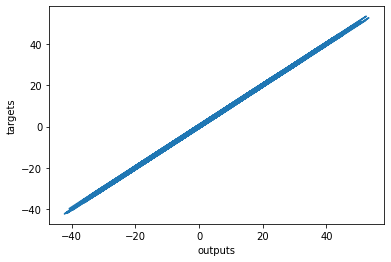

In [10]:
# Plot the last output vs targets after the training is supposedly over. 
# we need the outputs. Therefore, instead of the optimize and mean_loss operations, pass the "outputs" as the only parameter.
out = sess.run([outputs], 
               feed_dict={inputs: training_data['inputs']})
# The model is optimized, so the outputs are calculated based on the last form of the model

# np.squeeze squeezes the arrays in order to fit them to what the plot function expects.
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()
        